In [9]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import gwdet
from pdet import p_det_median

In [10]:
p = gwdet.detectability()

In [11]:
m_min, m_max, m_dim = 1, 100, 1000
z_min, z_max, z_dim = 1e-4, 2.2, 1000
m = np.linspace(1, 100, m_dim)
z = np.linspace(1e-4, 2.2, z_dim)

In [12]:
if __name__ == '__main__':
    p_det = p_det_median(m, z)

Commputing median p_det for each (m, z) pair:   0%|          | 0/1000000 [00:00<?, ?it/s]/Users/Federico/Documents/Corsi di studio/Università/Tesi/master_thesis/.venv/lib/python3.11/site-packages/pykerr/qnm.py:2: UserWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html. The pkg_resources package is slated for removal as early as 2025-11-30. Refrain from using this package or pin to Setuptools<81.
  import pkg_resources
/Users/Federico/Documents/Corsi di studio/Università/Tesi/master_thesis/.venv/lib/python3.11/site-packages/pykerr/qnm.py:2: UserWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html. The pkg_resources package is slated for removal as early as 2025-11-30. Refrain from using this package or pin to Setuptools<81.
  import pkg_resources
/Users/Federico/Documents/Corsi di studio/Università/Tesi/master_thesis/.venv/lib/python3.11/site-packages/pykerr/qnm.py:2: UserWa

In [13]:
# p_det = np.zeros((z_dim, m_dim))

# with tqdm(total=z_dim * m_dim) as pbar:
#     for _z, i in zip(z, range(z_dim)):
#         pbar.set_description_str('z: {i}/{z_dim}'.format(i=i, z_dim=z_dim))
#         for _m, j in zip(m, range(m_dim)):
#             p_det[i, j] = np.median(p(np.zeros(m_dim) + _m, m, np.zeros(m_dim) + _z))
#             pbar.update(1)

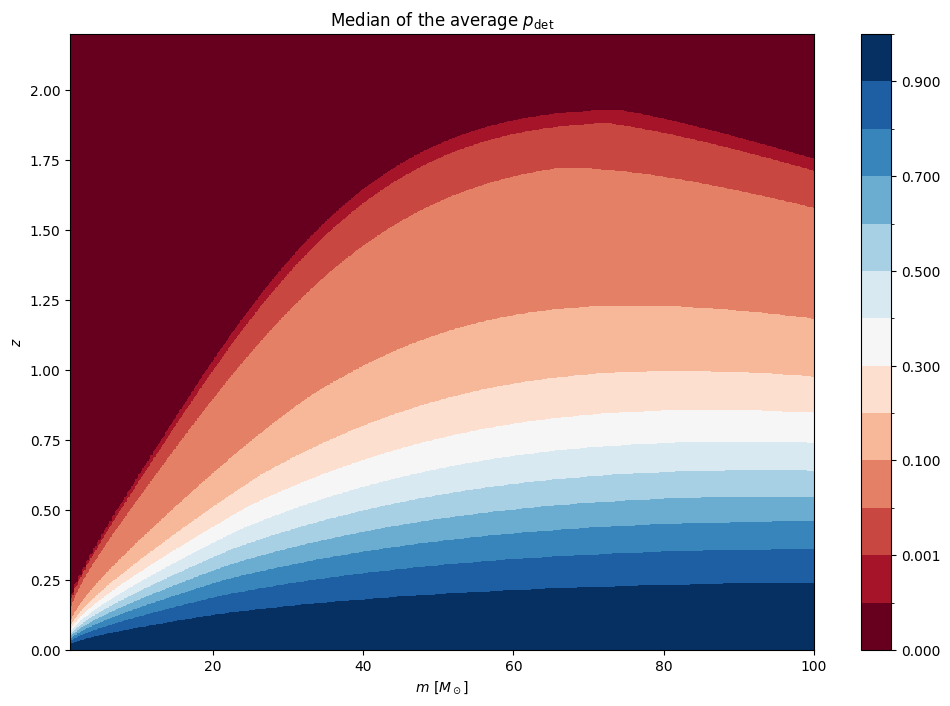

In [14]:
fig, ax = plt.subplots(figsize=(12, 8))

ax.set_title(r'Median of the average $p_\text{det}$')
ax.set_xlabel(r'$m\ [M_\odot$]')
ax.set_ylabel(r'$z$')

cmap = plt.colormaps['RdBu']

# im = ax.pcolormesh(m, z, p_det, cmap=cmap, norm=mpl.colors.Normalize(vmin=0, vmax=1))
# im = ax.pcolormesh(m, z, p_det, cmap=cmap, norm=mpl.colors.AsinhNorm(linear_width=np.min(p_det[p_det != 0]), vmin=0, vmax=1))

levels = [1e-5, 1e-4, 1e-3, 1e-2, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1]
im = ax.pcolormesh(m, z, p_det, cmap=cmap,
                   norm=mpl.colors.BoundaryNorm(levels, ncolors=cmap.N, clip=True))
fig.colorbar(im, ax=ax)

plt.show()

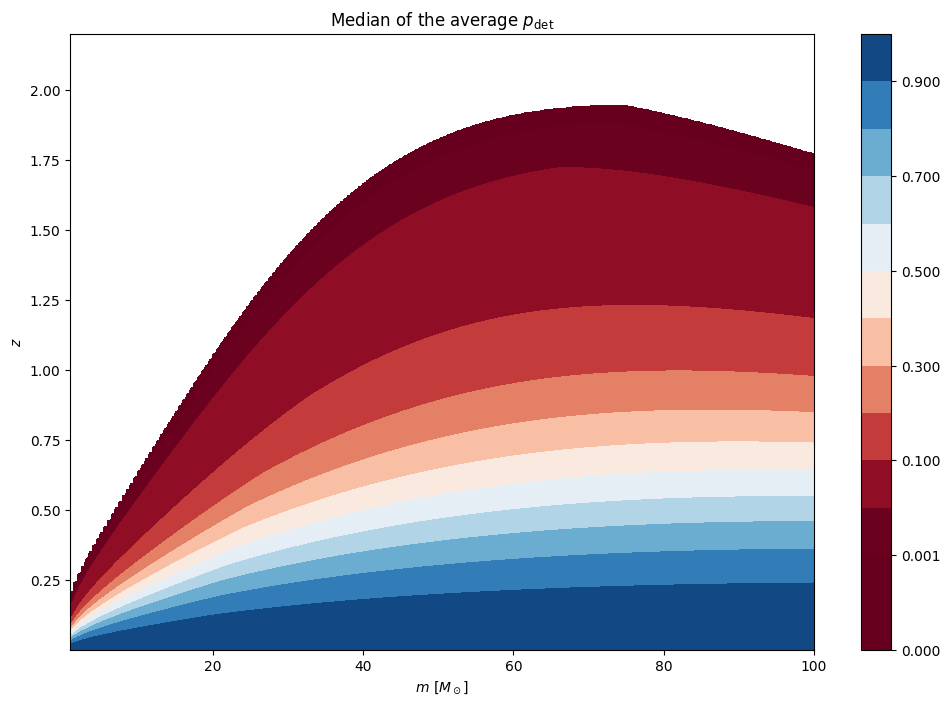

In [15]:
fig, ax = plt.subplots(figsize=(12, 8))

ax.set_title(r'Median of the average $p_\text{det}$')
ax.set_xlabel(r'$m\ [M_\odot$]')
ax.set_ylabel(r'$z$')

cmap = plt.colormaps['RdBu']

levels = [1e-5, 1e-4, 1e-3, 1e-2, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1]
cf = ax.contourf(m, z, p_det, levels=levels, cmap=cmap)

fig.colorbar(cf, ax=ax)

plt.show()